In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../common')
from utils import process_group

In [2]:
avg_039, t_el, ql_dyn, ql_sta = process_group(group='B039',
                                              num_sections=10,
                                              prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ', 
                                              zone_idx='auto',
                                              num_cores=24)

2023-11-24 11:12:38,559 utils                   : total number of files in B039  is 2780
2023-11-24 11:13:54,459 utils                   : label='B039_section_00': remove 28 datasets out of 278
2023-11-24 11:13:54,471 utils                   : label='B039_section_01': remove 31 datasets out of 278
2023-11-24 11:13:54,597 utils                   : label='B039_section_03': remove 32 datasets out of 278
2023-11-24 11:13:54,606 utils                   : label='B039_section_04': remove 32 datasets out of 278
2023-11-24 11:13:54,686 utils                   : label='B039_section_02': remove 28 datasets out of 278
2023-11-24 11:13:54,774 utils                   : label='B039_section_06': remove 29 datasets out of 278
2023-11-24 11:13:54,898 utils                   : label='B039_section_08': remove 30 datasets out of 278
2023-11-24 11:13:54,940 utils                   : label='B039_section_07': remove 32 datasets out of 278
2023-11-24 11:13:55,049 utils                   : label='B039_section_0

In [3]:
avg_040, _, _, _ = process_group(group='B040',
                                 num_sections=10, 
                                 prefix='/home/8ididata/2021-2/babnigg202107_2/cluster_results_QZ',
                                 zone_idx='auto',
                                 num_cores=24)

2023-11-24 11:13:55,972 utils                   : total number of files in B040  is 2780
2023-11-24 11:15:30,750 utils                   : label='B040_section_00': remove 31 datasets out of 278
2023-11-24 11:15:30,827 utils                   : label='B040_section_01': remove 34 datasets out of 278
2023-11-24 11:15:30,916 utils                   : label='B040_section_02': remove 31 datasets out of 278
2023-11-24 11:15:31,018 utils                   : label='B040_section_03': remove 31 datasets out of 278
2023-11-24 11:15:31,197 utils                   : label='B040_section_04': remove 32 datasets out of 278
2023-11-24 11:15:31,215 utils                   : label='B040_section_06': remove 31 datasets out of 278
2023-11-24 11:15:31,334 utils                   : label='B040_section_07': remove 31 datasets out of 278
2023-11-24 11:15:31,363 utils                   : label='B040_section_09': remove 30 datasets out of 278
2023-11-24 11:15:31,468 utils                   : label='B040_section_0

In [4]:
plt.rcParams['pdf.fonttype'] = 42
# plt.rcParams['font.sans-serif'] = 'Helvetica'   # not installed on tanzanite
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.size'] = 6
plt.rcParams['figure.dpi'] = 300

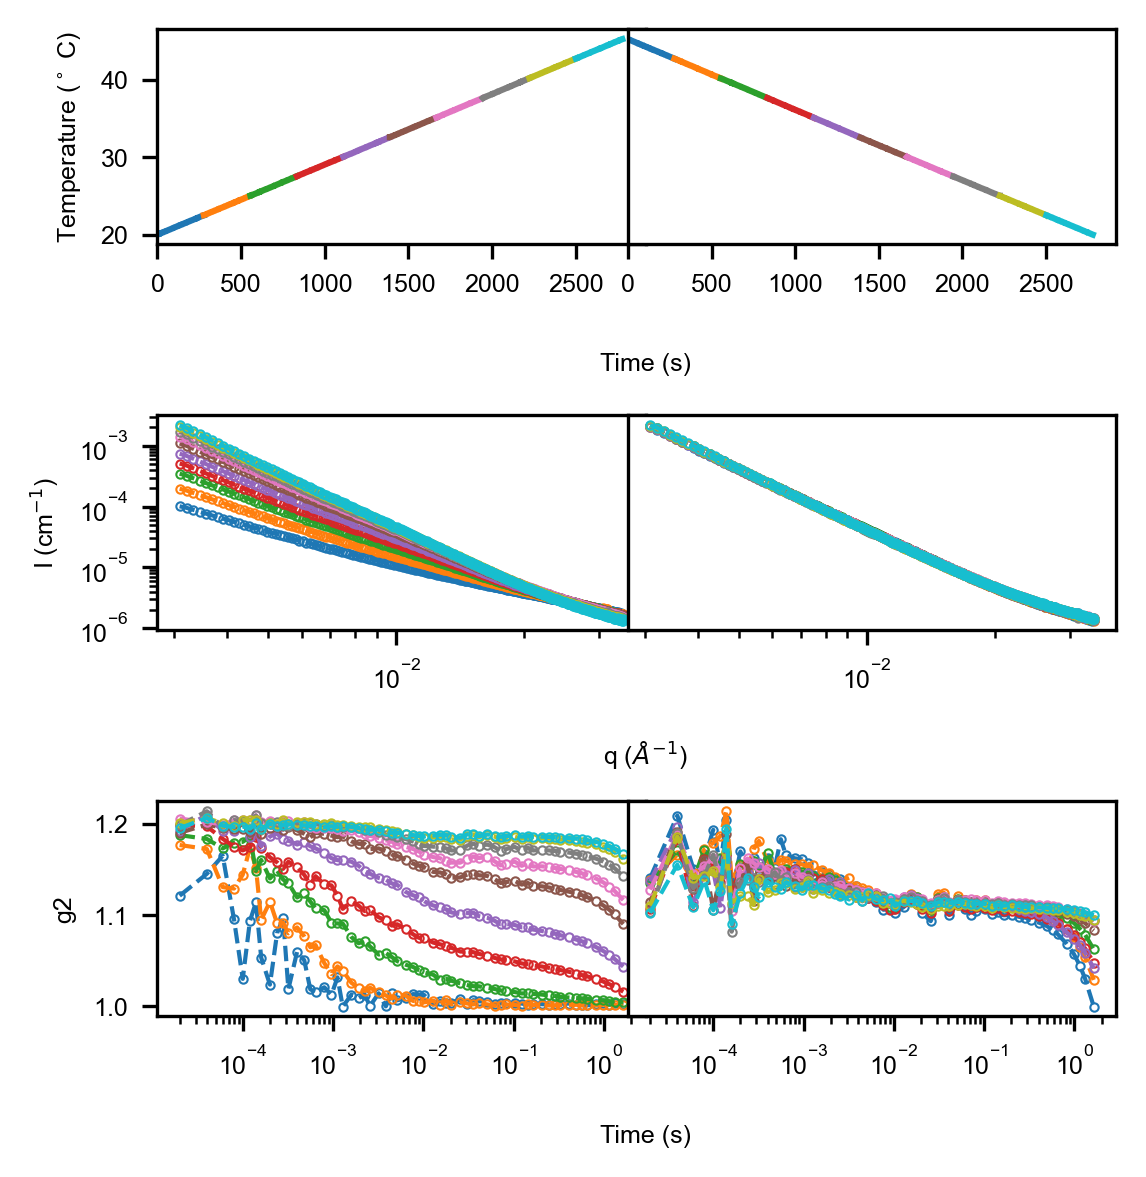

In [5]:
fig, ax = plt.subplots(3, 2, figsize=(3.8, 4.0))
for n in range(3):
    ax[n, 1].get_yaxis().set_visible(False)
    # ax[n, 0].xaxis.set_label_coords(0.9, -0.25)

def plot_one_column(ax, avg_data_list, omit_label=False, g2_idx=0):
    for avg_dict in avg_data_list:
        ax[0].plot(avg_dict['temperature_x'], avg_dict['temperature'])
        
        # have to remove the last few points
        ax[1].loglog(ql_sta[:-4], avg_dict['saxs_1d'][:-4], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
        
        # x = np.
        ax[2].plot(t_el, avg_dict['g2'][:, g2_idx], 'o--', lw=1, ms=2, mew=0.5, mfc='none')
    
    if not omit_label:
        ax[0].set_ylabel('Temperature ($^\circ$ C)')
        ax[1].set_ylabel('I (cm$^{-1}$)')
        ax[2].set_ylabel('g2')

        ax[0].set_xlabel('Time (s)')
        ax[1].set_xlabel('q ($\\AA^{-1}$)')
        ax[2].set_xlabel('Time (s)')
        ax[0].xaxis.set_label_coords(1.0, -0.5)
        ax[1].xaxis.set_label_coords(1.0, -0.5)
        ax[2].xaxis.set_label_coords(1.0, -0.5)

    # additional setup
    ax[0].set_xlim(0, None)
    ax[2].set_xscale('log')
        
plot_one_column(ax[:, 0], avg_039)
plot_one_column(ax[:, 1], avg_040, omit_label=True)
 
plt.tight_layout(w_pad=-1, h_pad=0.125)
plt.savefig('figure2.png', dpi=300)
# plt.savefig('figure2.pdf')
# plt.tight_layout()